# IECO EDA

## Installing Libraries

In [ ]:
import os
import zipfile
import gdown
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter


# Create a folder for the dataset
!mkdir -p /content/roof_dataset

# Download the dataset using gdown
!gdown --id 1LWX0HIMx2R_NttIUo8VwsH9pYBB2Np6X -O /content/roof_dataset/dataset.zip

# Unzip the contents of the dataset
!unzip /content/roof_dataset/dataset.zip -d /content/roof_dataset

# Confirm that the dataset was downloaded and extracted
!echo "Dataset downloaded and extracted successfully."


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1LWX0HIMx2R_NttIUo8VwsH9pYBB2Np6X
From (redirected): https://drive.google.com/uc?id=1LWX0HIMx2R_NttIUo8VwsH9pYBB2Np6X&confirm=t&uuid=8924fe1d-ccc2-4505-8a72-52b5336416ad
To: /content/roof_dataset/dataset.zip
100% 242M/242M [00:03<00:00, 64.2MB/s]
Archive:  /content/roof_dataset/dataset.zip
   creating: /content/roof_dataset/omdena/
   creating: /content/roof_dataset/omdena/eb4e2aa8435621a15e5168e0b5e9ae16be4df5d7/
  inflating: /content/roof_dataset/omdena/eb4e2aa8435621a15e5168e0b5e9ae16be4df5d7/info.json  
  inflating: /content/roof_dataset/omdena/eb4e2aa8435621a15e5168e0b5e9ae16be4df5d7/planes.json  
  inflating: /content/roof_dataset/omdena/eb4e2aa8435621a15e5168e0b5e9ae16be4df5d7/google.jpg  
  inflatin

In [ ]:
# Set up plotting style
plt.style.use('seaborn')
sns.set_palette("deep")

<ipython-input-2-8bd495e0a714>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## EDA

Now that we have our data loaded, let's formulate 10 key questions for our EDA:

* What is the total number of roof samples in the dataset?
* What types of files are present in each roof sample folder?
* What are the dimensions and file sizes of the image files (JPG)?
* What information is contained in the JSON files?
* Are there any missing files or inconsistencies across the sample folders?
* What is the distribution of roof sizes (if available in the data)?
* Are there any patterns or clusters in the point cloud data?
* What is the quality and resolution of the images?
* Are there any correlations between image features and point cloud data?
* How diverse is the dataset in terms of roof types or geographical locations?

What is the total number of roof samples in the dataset?

In [ ]:
import os

def count_samples(root_dir):
    return len([name for name in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, name))])

root_dir = '/content/roof_dataset/omdena'
total_samples = count_samples(root_dir)
print(f"Total number of roof samples: {total_samples}")

Total number of roof samples: 239


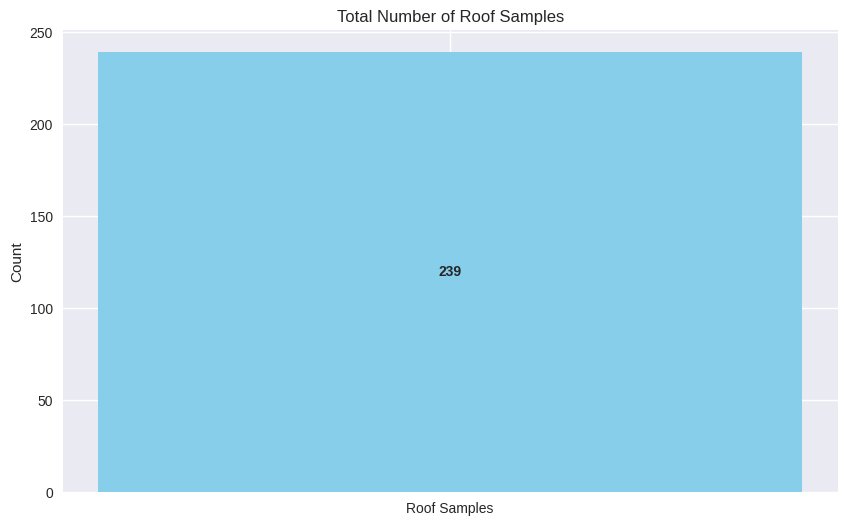

In [ ]:
def count_samples(root_dir):
    return len([name for name in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, name))])

root_dir = '/content/roof_dataset/omdena'
total_samples = count_samples(root_dir)

plt.figure(figsize=(10, 6))
plt.bar(['Roof Samples'], [total_samples], color='skyblue')
plt.title('Total Number of Roof Samples')
plt.ylabel('Count')
plt.text('Roof Samples', total_samples/2, str(total_samples),
         ha='center', va='center', fontweight='bold')
plt.show()

What types of files are present in each roof sample folder?

In [ ]:
def print_tree(root_dir, indent=''):
    for i, item in enumerate(os.listdir(root_dir)):
        path = os.path.join(root_dir, item)
        if os.path.isdir(path):
            # Print the directory with a tree structure
            print(f"{indent}├── {item}/")
            # Recursively print the contents of the directory
            print_tree(path, indent + '│   ')
        else:
            # Print files in the directory
            print(f"{indent}├── {item}")

# Specify the root directory
root_dir = '/content/roof_dataset/omdena'

# Print the folder structure as a tree
print(f"{root_dir}/")
print_tree(root_dir)


/content/roof_dataset/omdena/
├── deb080cf072408ac943c6e076851bcbf35ab556f/
│   ├── bing.jpg
│   ├── google.jpg
│   ├── sigpac.jpg
│   ├── info.json
│   ├── dsm.json
│   ├── planes.json
├── 826740669e451eb4d8dbff26409bf8743ff03cb8/
│   ├── bing.jpg
│   ├── google.jpg
│   ├── sigpac.jpg
│   ├── info.json
│   ├── dsm.json
│   ├── planes.json
├── 470a0a74a1de69d8e290f49ca516cdc6c82ba62a/
│   ├── bing.jpg
│   ├── google.jpg
│   ├── sigpac.jpg
│   ├── info.json
│   ├── dsm.json
│   ├── planes.json
├── 7c27a83b1eecd916007dcd361aed6ebb0986109a/
│   ├── bing.jpg
│   ├── google.jpg
│   ├── sigpac.jpg
│   ├── info.json
│   ├── dsm.json
│   ├── planes.json
├── b4d122e17bb7fba6845fde3529817451ffbd6b6c/
│   ├── bing.jpg
│   ├── google.jpg
│   ├── sigpac.jpg
│   ├── info.json
│   ├── dsm.json
│   ├── planes.json
├── 8767a52e82e42bc896b32577312b0cc3b9dff125/
│   ├── bing.jpg
│   ├── google.jpg
│   ├── sigpac.jpg
│   ├── info.json
│   ├── dsm.json
│   ├── planes.json
├── 6caf88e9fddc4c63d7db543ef76d42

What are the dimensions and file sizes of the image files (JPG)

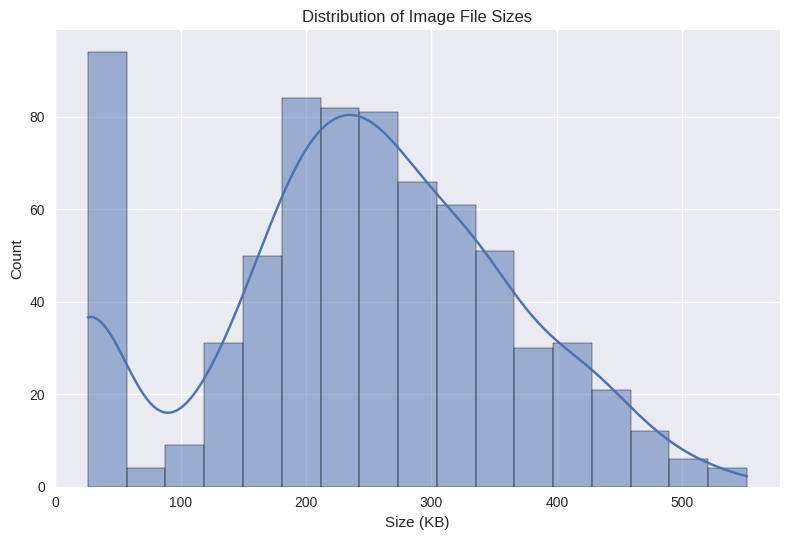

In [ ]:
def analyze_images(root_dir):
    image_info = []
    for sample_dir in os.listdir(root_dir):
        sample_path = os.path.join(root_dir, sample_dir)
        if os.path.isdir(sample_path):
            for file in os.listdir(sample_path):
                if file.lower().endswith(('.jpg', '.jpeg')):
                    img_path = os.path.join(sample_path, file)
                    with Image.open(img_path) as img:
                        size = os.path.getsize(img_path)
                        image_info.append({
                            'file': file,
                            'width': img.size[0],
                            'height': img.size[1],
                            'size_kb': size / 1024
                        })
    return pd.DataFrame(image_info)

image_df = analyze_images(root_dir)


sns.histplot(image_df['size_kb'], kde=True)
plt.title('Distribution of Image File Sizes')
plt.xlabel('Size (KB)')

plt.tight_layout()
plt.show()

What information is contained in the JSON files?

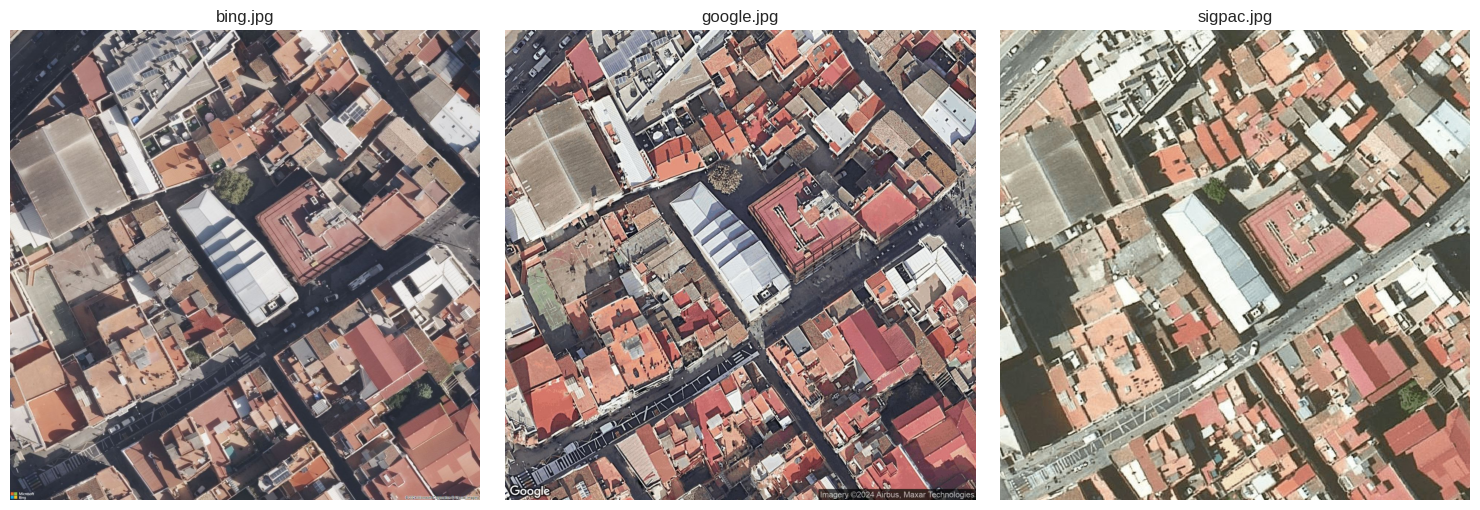

JSON file contents:

info.json:
{
    "author": "Billiah Kerubo",
    "latitude": 41.4499324503559,
    "longitude": 2.24656932222901,
    "size": 71.6152334957962
}

dsm.json:
[
    [
        437036.8400001882,
        4588998.989999933,
        9.919999958598055
    ],
    [
        437038.09000019723,
        4588999.240000121,
        9.780000115684231
    ],
    [
        437039.5799999025,
        4588999.730000006,
        9.810000040805903
    ],
    [
        437040.77000022033,
        4589001.040000171,
        9.749999902043498
    ],
    [
        437040.7400001419,
        4588999.329999891,
        9.620000130343271
    ],
    [
        437042.10999999905,
        4588998.200000196,
        9.690000051800155
    ],
    [
        437042.1400000775,
        4588999.849999853,
        9.639999984251347
    ],
    [
        437042.18000018207,
        4589001.550000108,
        9.690000051800155
    ],
    [
        437043.69999996584,
        4589000.779999957,
        9.55

In [ ]:
import os
import json
from PIL import Image
import matplotlib.pyplot as plt

def visualize_sample_dir(sample_dir):
    # List to store image paths
    image_paths = []

    # Dictionary to store JSON file content
    json_content = {}

    # Iterate through the files in the selected directory
    for file in os.listdir(sample_dir):
        file_path = os.path.join(sample_dir, file)

        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_paths.append(file_path)  # Collect image paths

        elif file.endswith('.json'):
            # Load JSON content
            with open(file_path, 'r') as f:
                data = json.load(f)
                json_content[file] = data  # Store the entire content for this example

    # Plot the images (if any)
    if image_paths:
        num_images = len(image_paths)
        plt.figure(figsize=(15, 5))

        for i, img_path in enumerate(image_paths, 1):
            img = Image.open(img_path)
            plt.subplot(1, num_images, i)
            plt.imshow(img)
            plt.title(os.path.basename(img_path))
            plt.axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("No images found in this directory.")

    # Print the contents of JSON files
    print("JSON file contents:")
    for file, content in json_content.items():
        print(f"\n{file}:")
        print(json.dumps(content, indent=4))  # Pretty print JSON content

# Example usage: Specify the directory you want to visualize (change this path accordingly)
sample_dir = '/content/roof_dataset/omdena/deb080cf072408ac943c6e076851bcbf35ab556f'

visualize_sample_dir(sample_dir)


**info.json:**

Contains metadata about the imagery and the collection process.
* Author
* Latitude and Longitude of the image
* Size , possibly in square meters.

**dsm.json:**

Likely represents a Digital Surface Model (DSM), a type of 3D model that captures the elevation of the earth's surface and objects on it (such as buildings).Also likely the point cloud data

This data can be visualized in a 3D viewer or processed further to analyze the topography of the area captured in the vertical image.

**planes.json:**

Contains information about planes detected in the point cloud data.
* Azimuth
* Height
* Perimeter: The vertices defining the shape of the plane, with X and Y coordinates.
* Tilt: Indicates the plane’s tilt from a vertical axis.


Are there any missing files or inconsistencies across the sample folders?

In [ ]:
def check_consistency(root_dir):
    file_counts = []
    for sample_dir in os.listdir(root_dir):
        sample_path = os.path.join(root_dir, sample_dir)
        if os.path.isdir(sample_path):
            file_counts.append(len(os.listdir(sample_path)))

    return pd.Series(file_counts)

consistency_data = check_consistency(root_dir)

print(f"Minimum files in a sample: {consistency_data.min()}")
print(f"Maximum files in a sample: {consistency_data.max()}")
print(f"Mean files per sample: {consistency_data.mean():.2f}")
print(f"Median files per sample: {consistency_data.median()}")

Minimum files in a sample: 6
Maximum files in a sample: 6
Mean files per sample: 6.00
Median files per sample: 6.0


In [ ]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

def load_dataset(root_dir):
    data = []
    for sample_dir in os.listdir(root_dir):
        sample_path = os.path.join(root_dir, sample_dir)
        if os.path.isdir(sample_path):
            sample_data = {'id': sample_dir}

            # Load info.json
            with open(os.path.join(sample_path, 'info.json'), 'r') as f:
                info = json.load(f)
                sample_data.update(info)

            # Load planes.json
            with open(os.path.join(sample_path, 'planes.json'), 'r') as f:
                planes = json.load(f)
                sample_data['num_planes'] = len(planes)
                sample_data['total_plane_area'] = sum(abs(p['height']) for p in planes)

            # Load DSM data (first 1000 points for memory efficiency)
            with open(os.path.join(sample_path, 'dsm.json'), 'r') as f:
                dsm = json.load(f)
                sample_data['dsm_points'] = dsm[:1000]

            # Get image sizes
            for img_file in ['bing.jpg', 'google.jpg', 'sigpac.jpg']:
                with Image.open(os.path.join(sample_path, img_file)) as img:
                    sample_data[f'{img_file}_size'] = img.size

            data.append(sample_data)

    return pd.DataFrame(data)

df = load_dataset('/content/roof_dataset/omdena')

In [ ]:
df

id          author   latitude  \
0    deb080cf072408ac943c6e076851bcbf35ab556f  Billiah Kerubo  41.449932   
1    826740669e451eb4d8dbff26409bf8743ff03cb8   Lovish Singla  38.276491   
2    470a0a74a1de69d8e290f49ca516cdc6c82ba62a            Sony  37.411751   
3    7c27a83b1eecd916007dcd361aed6ebb0986109a   Dolu Obatusin  43.295619   
4    b4d122e17bb7fba6845fde3529817451ffbd6b6c           Vince  41.647647   
..                                        ...             ...        ...   
234  85f465d4ceb938c8c554307040cebee99812353e           Seife  43.506124   
235  fa22f237c0e212535bbe89ac08cc5731b443a35d  Prabhat Tiwari  43.364359   
236  1b5c8fd76110746fc3bbb8eac3b39fd8d936cb27     Zar Kyi Win  38.000671   
237  cb5abd4f788f4487e8172ced2acd8c0ec5508db7  Prabhat Tiwari  43.347275   
238  642103762bfd4b056f5786b3d7b58b810c458559     Daniel Cano  41.636611   

     longitude        size  num_planes  total_plane_area  \
0     2.246569   71.615233           1              0.00   
1    -0.717435  150.013516           1             10.50   
2    -5.957858  151.782925           1              4.34   
3    -2.918118  139.081987           1              9.05   
4    -0.875885  142.793104           1             18.88   
..         ...         ...         ...               ...   
234  -5.730229  138.599593           8             32.50   
235  -8.401198  277.849338           4             37.70   
236  -1.130785   75.290811           4             24.00   
237  -8.421117   69.481894           4             26.00   
238  -4.705854   71.408781           2              8.40   

                                            dsm_points bing.jpg_size  \
0    [[437036.8400001882, 4588998.989999933, 9.9199...  (1280, 1280)   
1    [[699593.86, 4238885.4, 130.43], [699594.1, 42...  (1280, 1280)   
2    [[238193.12999977972, 4144589.32000016, 22.699...  (1280, 1280)   
3    [[506581.68999994255, 4793675.260000013, 38.27...  (1280, 1280)   
4    [[676818.3200000001, 4612765.66, 204.81], [676...  (1280, 1280)   
..                                                 ...           ...   
234  [[279341.54999977263, 4820654.029999872, 30.86...  (1280, 1280)   
235  [[548382.73, 4801450.03, 7.28], [548381.66, 48...  (1280, 1280)   
236  [[664155.29, 4207504.79, 37.88], [664155.22, 4...  (1280, 1280)   
237  [[546889.0400000034, 4799522.94999996, 32.9100...  (1280, 1280)   
238  [[357905.27, 4610815.05, 714.99], [357902.07, ...  (1280, 1280)   

    google.jpg_size sigpac.jpg_size  bing.jpg_megapixels  \
0      (1280, 1280)    (1280, 1280)               1.6384   
1      (1280, 1280)    (1280, 1280)               1.6384   
2      (1280, 1280)    (1280, 1280)               1.6384   
3      (1280, 1280)    (1280, 1280)               1.6384   
4      (1280, 1280)    (1280, 1280)               1.6384   
..              ...             ...                  ...   
234    (1280, 1280)    (1280, 1280)               1.6384   
235    (1280, 1280)    (1280, 1280)               1.6384   
236    (1280, 1280)    (1280, 1280)               1.6384   
237    (1280, 1280)    (1280, 1280)               1.6384   
238    (1280, 1280)    (1280, 1280)               1.6384   

     google.jpg_megapixels  sigpac.jpg_megapixels  
0                   1.6384                 1.6384  
1                   1.6384                 1.6384  
2                   1.6384                 1.6384  
3                   1.6384                 1.6384  
4                   1.6384                 1.6384  
..                     ...                    ...  
234                 1.6384                 1.6384  
235                 1.6384                 1.6384  
236                 1.6384                 1.6384  
237                 1.6384                 1.6384  
238                 1.6384                 1.6384  

[239 rows x 14 columns]

What is the distribution of roof sizes?

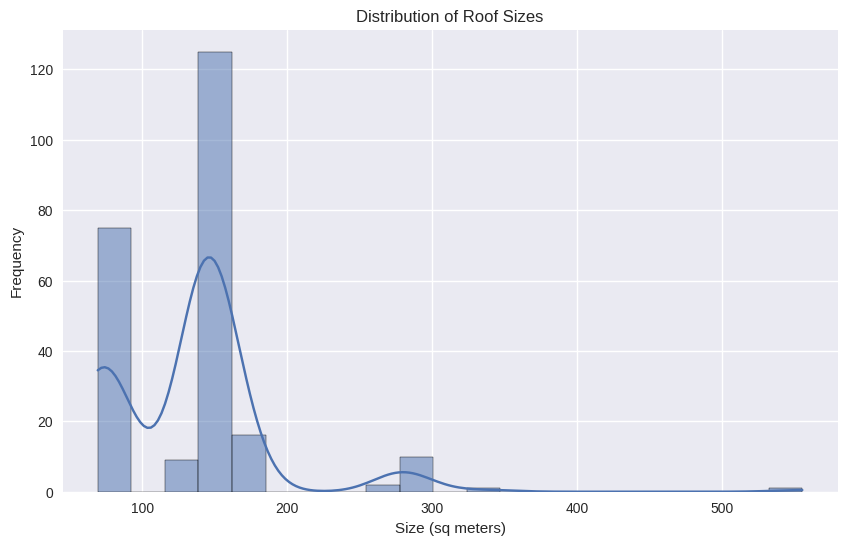

Average roof size: 133.37 sq meters
Median roof size: 142.95 sq meters


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['size'], kde=True)
plt.title('Distribution of Roof Sizes')
plt.xlabel('Size (sq meters)')
plt.ylabel('Frequency')
plt.show()

print(f"Average roof size: {df['size'].mean():.2f} sq meters")
print(f"Median roof size: {df['size'].median():.2f} sq meters")

Are there any patterns or clusters in the point cloud data?

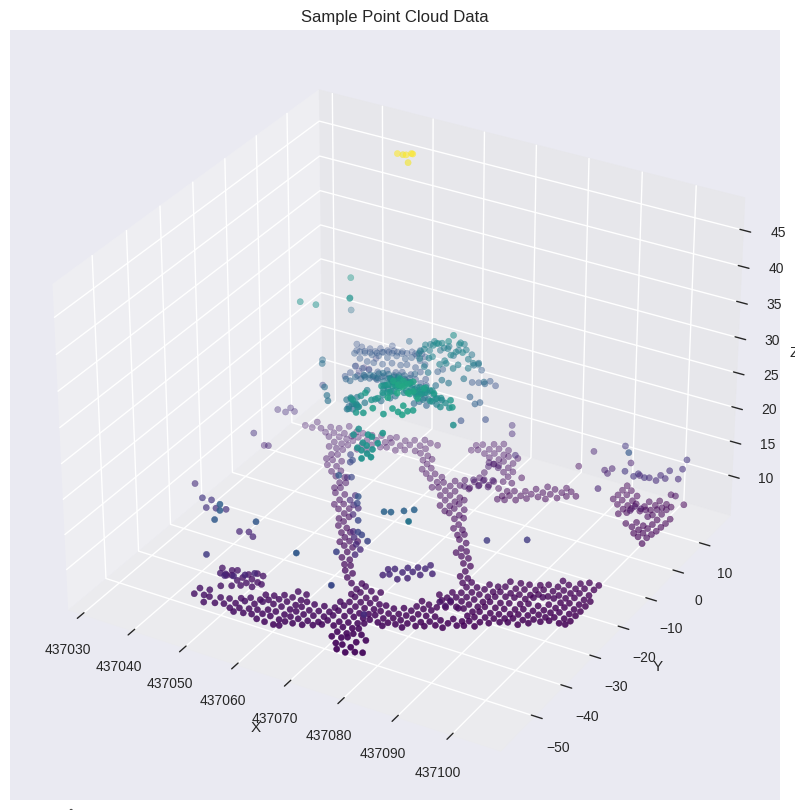

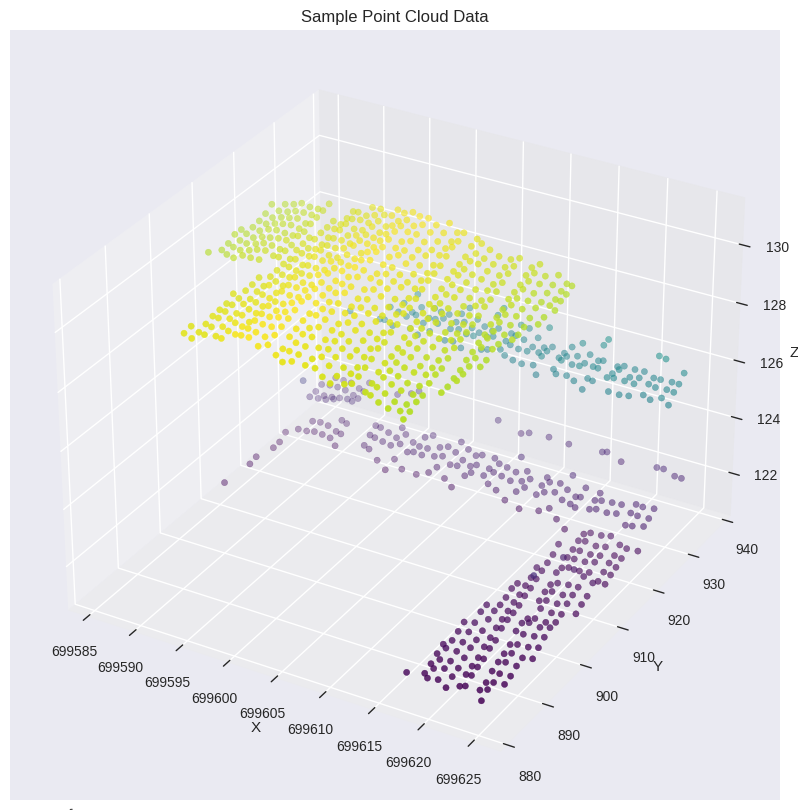

In [ ]:
def plot_sample_point_cloud(dsm_points):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    points = np.array(dsm_points)
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap='viridis')
    plt.title('Sample Point Cloud Data')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

plot_sample_point_cloud(df['dsm_points'].iloc[0])
plot_sample_point_cloud(df['dsm_points'].iloc[1])

How diverse is the dataset in terms of geographical locations?

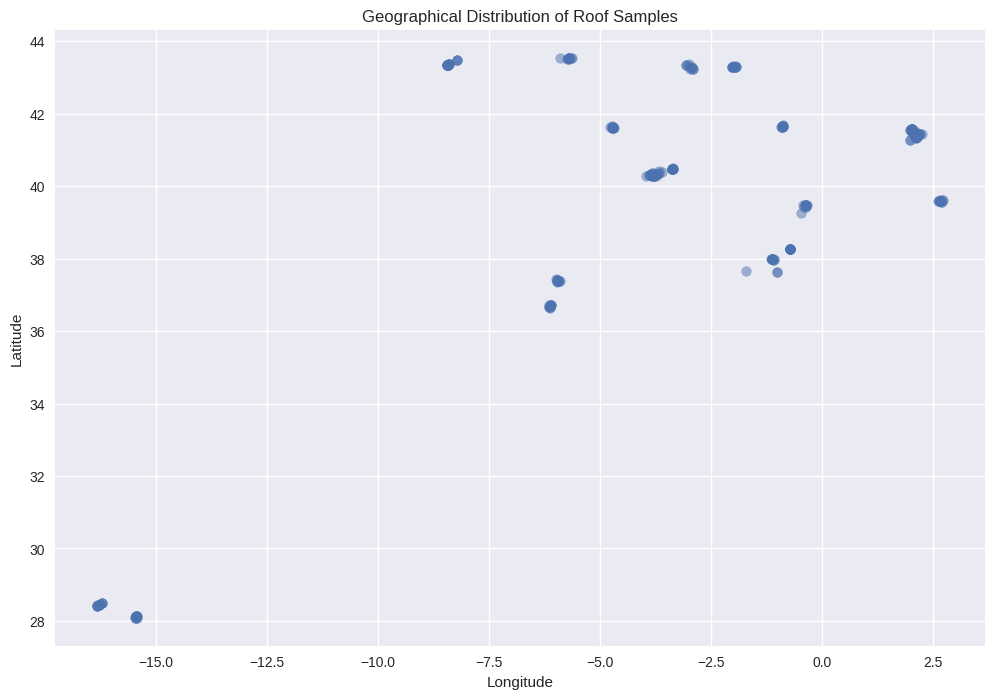

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5)
plt.title('Geographical Distribution of Roof Samples')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

How do the different image sources (Bing, Google, Sigpac) compare in terms of quality?

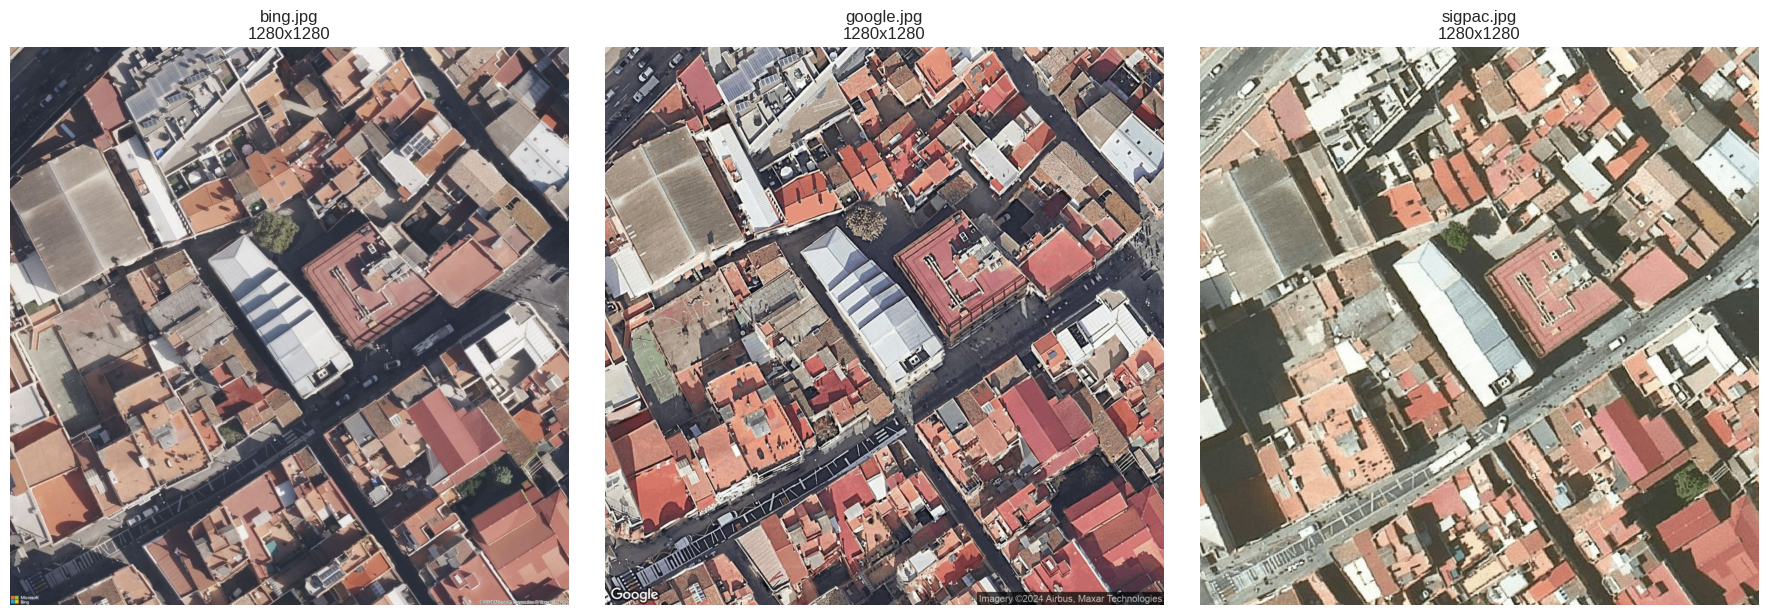

In [ ]:
def plot_sample_images(sample_id):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    image_types = ['bing.jpg', 'google.jpg', 'sigpac.jpg']

    for i, img_type in enumerate(image_types):
        img_path = os.path.join('/content/roof_dataset/omdena', sample_id, img_type)
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(f'{img_type}\n{img.size[0]}x{img.size[1]}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

plot_sample_images(df['id'].iloc[0])
